In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True
})
sns.set(font_scale=1)
#sns.set_style("darkgrid")
#sns.set_context("poster")
import sys
import os
from scipy.optimize import newton, minimize, fsolve
from scipy.interpolate import InterpolatedUnivariateSpline, krogh_interpolate, PchipInterpolator, interp1d
import numpy as np
import copy
import re
from pathlib import Path

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
palette.extend(['salmon', 'teal','yellowgreen'])
%matplotlib inline

In [13]:
data_file = 'results_flat.xlsx'
df = pd.read_excel(data_file)

In [14]:
df

,Proliferation rate,Seeding,Drug,Conc (mM),Replicate
0,1.031363,Dispersed,Metformin,0.1,1
1,1.067158,Dispersed,Metformin,0.1,2
2,1.062121,Dispersed,Metformin,0.1,3
3,0.949488,Dispersed,Metformin,0.1,4
4,1.000850,Dispersed,Metformin,0.1,5
...,...,...,...,...,...
103,-0.219658,Centered,Metformin,16.0,2
104,-0.235883,Centered,Metformin,16.0,3
105,-0.272604,Centered,Metformin,16.0,4
106,-0.353174,Centered,Metformin,16.0,5


In [21]:
# df[df['Seeding'] == 'Dispersed']
fits = neutcurve.CurveFits(df, conc_col='Conc (mM)', fracinf_col='Proliferation rate', serum_col='Drug', virus_col='Seeding', replicate_col='Replicate', fixtop=False, fixbottom=False)

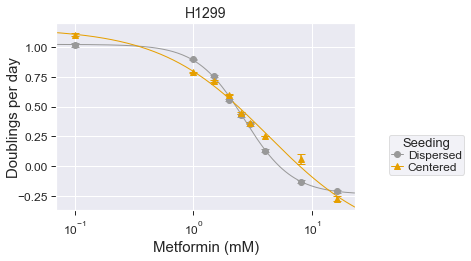

In [38]:
plot_name = 'IC50_curve.pdf'
pdf_plot = matplotlib.backends.backend_pdf.PdfPages(plot_name)

fig, ax = fits.plotSera(titles = ['H1299'], legendtitle='Seeding', xlabel='Metformin (mM)', ylabel='Doublings per day')
fig.set_figwidth(7)
fig.set_figheight(5)
pdf_plot.savefig(fig, bbox_inches='tight')
pdf_plot.close()